In [94]:
from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from numpy.random import randint
import numpy as np
from common_functions import encode_message, decode_message

# TODO: Enable Code formatting
# %load_ext jupyter_black

In [95]:
n = 100

In [96]:
# TODO: Nonce generation at the beggining is skipped

In [97]:
# Verifier and Prover generate n random bases a and b
a_bases = randint(2, size=n)
print("a bases:", a_bases)
b_bases = randint(2, size=n)
print("\nb bases:", b_bases)

# Verifier generates n random challenger-bits c
c_bits = randint(2, size=n)
print("\nc bits:", c_bits)

a bases: [0 1 1 1 0 0 0 1 1 0 1 0 0 1 0 0 0 1 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 1 0 0 0
 1 1 1 0 0 0 0 1 0 0 0 1 1 1 0 0 1 0 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 0 1 0
 1 0 1 1 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1]

b bases: [0 1 0 1 1 0 1 1 0 0 0 1 1 1 0 1 1 1 0 1 1 0 0 0 1 0 1 1 0 0 0 1 0 0 0 1 1
 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 1 1 0 0 0 1 1 1 0 1 1 1 0 0 1 1 0 1 1 0 1 1
 1 0 0 1 0 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 1 1 0 1]

c bits: [0 0 1 1 1 1 0 1 0 1 0 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 1 0 1 0 1 0 0 1 1 0 1
 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 1 1 1 1 0 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1]


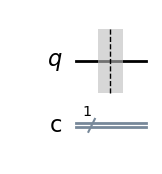

In [98]:
# Encode c in a
message = encode_message(c_bits, a_bases, n)

# Draw the circuit bit 0
message[0].draw(output="mpl")

In [99]:
# Prover decodes the qubits in the bases a and store them as c'
c_prime_bits = decode_message(message, a_bases, n)
print("\nc' bits:", c_prime_bits)


c' bits: [0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [100]:
# Prover re-encode the qubits in the bases b and sends them to the Verifier
message_back = encode_message(c_prime_bits, b_bases, n)

# Verifier decodes the message in the bases b and store them as c''
c_prime_two_bits = decode_message(message_back, b_bases, n)

# Verifier compares c' and c''
print(np.array_equal(c_bits, c_prime_two_bits))

True


In [101]:
# TODO: Last step is a MAC check
# TODO: CURRENTLY I SEND ALL OF THE BITS. THEY NEED TO BE SEND ONE BY ONE. SO I NEED LOOP THROUGH IT